In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/研究所課程/統計分析程式/資料集/rent_house - rent_house.csv')

In [ ]:
df.columns

Index(['bedroom', 'bathrooms', 'area', 'furnishing', 'avalable_for', 'address',
       'floor_number', 'facing', 'floor_type', 'gate_community', 'corner_pro',
       'parking', 'wheelchairadption', 'petfacility', 'aggDur', 'noticeDur',
       'lightbill', 'powerbackup', 'propertyage', 'no_room', 'pooja_room',
       'study_room', 'others', 'servant_room', 'store_room', 'maintenance_amt',
       'brok_amt', 'deposit_amt', 'mnt_amt', 'rent'],
      dtype='object')

In [ ]:
df.isnull().sum()

bedroom              0
bathrooms            0
area                 0
furnishing           0
avalable_for         0
address              0
floor_number         0
facing               0
floor_type           0
gate_community       0
corner_pro           0
parking              0
wheelchairadption    0
petfacility          0
aggDur               0
noticeDur            0
lightbill            0
powerbackup          0
propertyage          0
no_room              0
pooja_room           0
study_room           0
others               0
servant_room         0
store_room           0
maintenance_amt      0
brok_amt             0
deposit_amt          0
mnt_amt              0
rent                 0
dtype: int64

In [ ]:
for i in range(len(df)):
  if df['facing'][i]=='No Direction':
    df=df.drop(index=[i])
  elif df['facing'][i]=='South-West':
    df=df.drop(index=[i])
  elif df['facing'][i]=='South-East':
    df=df.drop(index=[i])
  elif df['avalable_for'][i]== 'Family , Bachelors (Men Only)':
    df=df.drop(index=[i])
  elif df['avalable_for'][i]== 'Family , Bachelors (Women Only)':
    df=df.drop(index=[i])
  elif df['avalable_for'][i]== 'Bachelors (Men Only)':
    df=df.drop(index=[i])
  elif df['avalable_for'][i]== 'Bachelors (Women Only)':
    df=df.drop(index=[i])
  elif df['avalable_for'][i]== 'Bachelors (Men/Women)':
    df=df.drop(index=[i])
  elif df['avalable_for'][i]== 'None':
    df=df.drop(index=[i])
  elif df['area'][i]== 0:
    df=df.drop(index=[i])

In [ ]:
import numpy as np
print ("Shape Of The Before Ouliers: ",df.shape)
n=1.2
#IQR = Q3-Q1
IQR = np.percentile(df['rent'],75) - np.percentile(df['rent'],25)
#outlier = Q3 + n*IQR
df=df[df['rent'] < np.percentile(df['rent'],75)+n*IQR]
#outlier = Q1 - n*IQR
df=df[df['rent'] > np.percentile(df['rent'],25)-n*IQR]
print ("Shape Of The After Ouliers: ",df.shape)

Shape Of The Before Ouliers:  (4583, 30)
Shape Of The After Ouliers:  (4280, 30)


In [ ]:
import numpy as np
print ("Shape Of The Before Ouliers: ",df.shape)
n=1.8
#IQR = Q3-Q1
IQR = np.percentile(df['area'],75) - np.percentile(df['area'],25)
#outlier = Q3 + n*IQR
df=df[df['area'] < np.percentile(df['area'],75)+n*IQR]
#outlier = Q1 - n*IQR
df=df[df['area'] > np.percentile(df['area'],25)-n*IQR]
print ("Shape Of The After Ouliers: ",df.shape)

Shape Of The Before Ouliers:  (4280, 30)
Shape Of The After Ouliers:  (4210, 30)


In [ ]:
df = df.reset_index(drop=True)
df

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,...,0,0,0,0,0,0,0,40000,0.0,13000.0
3,3,3,1530.0,Semifurnished,Family Only,"Atul Westernhills, Baner-Sus, , Pune, Maharashtra",2,East,Vitrified,Yes,...,1,0,0,0,0,0,28000,3,0.0,28000.0
4,3,3,1400.0,Unfurnished,All,"Magarpatta City Roystonea, Magarpatta, , Pune,...",2,North-West,Vitrified,Yes,...,1,0,0,0,0,0,25000,60000,0.0,25999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,2,2,800.0,Unfurnished,All,"Ravinanda Skylights, Wagholi, , Pune, Maharashtra",6,East,Vitrified,Yes,...,0,0,1,0,0,0,11000,25000,0.0,11000.0
4206,2,2,805.0,Semifurnished,All,"on request, Kharadi, , Pune, Maharashtra",7,North,Marble,Yes,...,0,0,0,0,1,0,20000,3,0.0,20000.0
4207,2,1,900.0,Unfurnished,Family Only,"Yashopuram Housing Society, Chinchwad, , Pune,...",0,North,Stone,Yes,...,0,0,0,0,0,0,0,45000,0.0,15000.0
4208,2,1,750.0,Unfurnished,Family Only,"Narayan Niwas, B.T Kawade Road, , Pune, Mahara...",0,South,Vitrified,Yes,...,0,0,1,0,0,0,15000,30000,0.0,15000.0


In [ ]:
df_F = df['facing'].to_numpy()
df_Y = df['avalable_for'].to_numpy()
df_R = df['rent'].to_numpy()
df_B = df['area'].to_numpy()

In [ ]:
df_R4 = pd.DataFrame({'facing':df_F,'avalable_for':df_Y,'rent':df_R,'area':df_B})

In [ ]:
df_R4

,facing,avalable_for,rent,area
0,West,All,20000.0,1050.0
1,East,All,14000.0,760.0
2,East,Family Only,13000.0,628.0
3,East,Family Only,28000.0,1530.0
4,North-West,All,25999.0,1400.0
...,...,...,...,...
4205,East,All,11000.0,800.0
4206,North,All,20000.0,805.0
4207,North,Family Only,15000.0,900.0
4208,South,Family Only,15000.0,750.0


檢查是否常態

In [ ]:
fa_E = df_R4[df_R4['facing']=='East']
fa_W = df_R4[df_R4['facing']=='West']
fa_S = df_R4[df_R4['facing']=='South']
fa_N = df_R4[df_R4['facing']=='North']
fa_NE = df_R4[df_R4['facing']=='North-East']
fa_NW = df_R4[df_R4['facing']=='North-West']

針對Facing-rent

In [ ]:
fa_E_R = fa_E.iloc[:,2:3]
fa_W_R = fa_W.iloc[:,2:3]
fa_S_R = fa_S.iloc[:,2:3]
fa_N_R = fa_N.iloc[:,2:3]
fa_NE_R = fa_NE.iloc[:,2:3]
fa_NW_R = fa_NW.iloc[:,2:3]

In [ ]:
fa_E_R = fa_E_R.to_numpy().flatten()
fa_W_R = fa_W_R.to_numpy().flatten()
fa_S_R = fa_S_R.to_numpy().flatten()
fa_N_R = fa_N_R.to_numpy().flatten()
fa_NE_R = fa_NE_R.to_numpy().flatten()
fa_NW_R = fa_NW_R.to_numpy().flatten()

In [ ]:
print('East:',len(fa_E),'\n','West:',len(fa_W),'\n','South:',len(fa_S),
      '\n','North:',len(fa_N),'\n','North-East:',len(fa_NE),'\n','North-West:',len(fa_NW))

East: 2535 
 West: 583 
 South: 207 
 North: 422 
 North-East: 320 
 North-West: 143


In [ ]:
import seaborn as sns

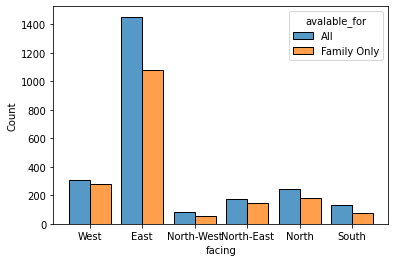

In [ ]:
sns.histplot(data=df_R4, x="facing", hue="avalable_for", multiple="dodge", shrink=.8)

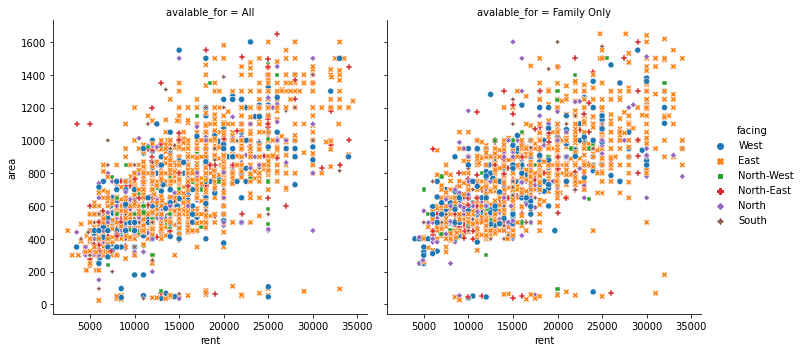

In [ ]:
sns.relplot(
    data=df_R4, x="rent", y="area",
    col="avalable_for", hue="facing", style="facing",
    kind="scatter"
)

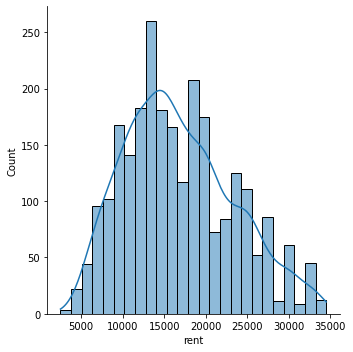

In [ ]:
sns.displot(data=fa_E,x='rent',kde='true')

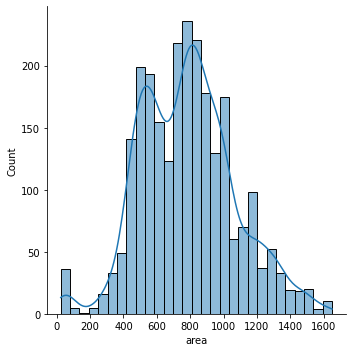

In [ ]:
sns.displot(data=fa_E,x='area',kde='true')

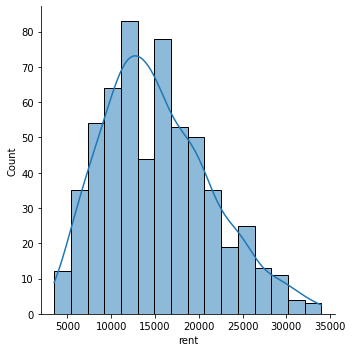

In [ ]:
sns.displot(data=fa_W,x='rent',kde='true')

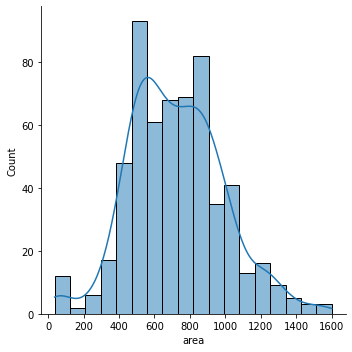

In [ ]:
sns.displot(data=fa_W,x='area',kde='true')

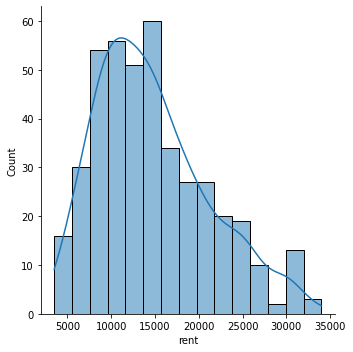

In [ ]:
sns.displot(data=fa_N,x='rent',kde='true')

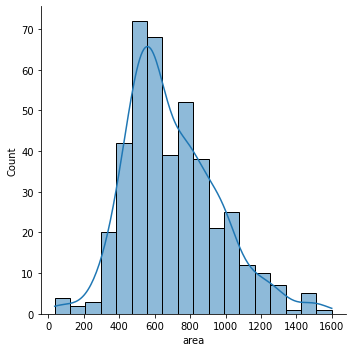

In [ ]:
sns.displot(data=fa_N,x='area',kde='true')

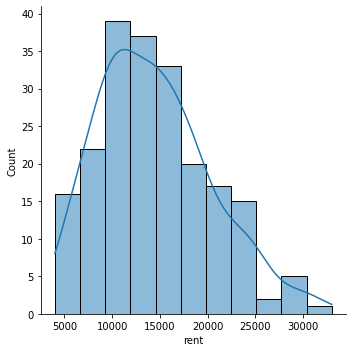

In [ ]:
sns.displot(data=fa_S,x='rent',kde='true')

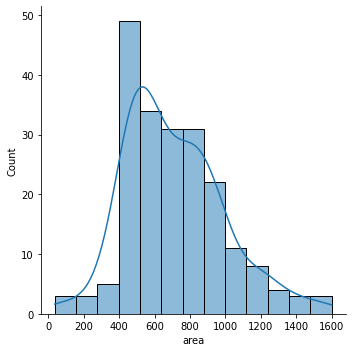

In [ ]:
sns.displot(data=fa_S,x='area',kde='true')

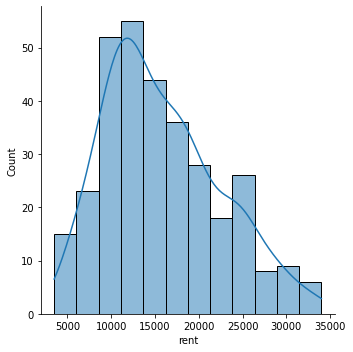

In [ ]:
sns.displot(data=fa_NE,x='rent',kde='true')

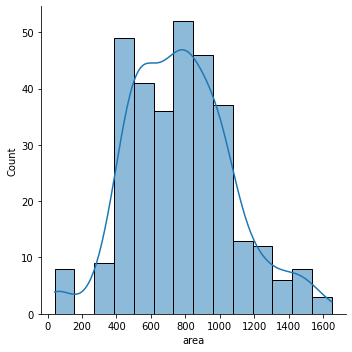

In [ ]:
sns.displot(data=fa_NE,x='area',kde='true')

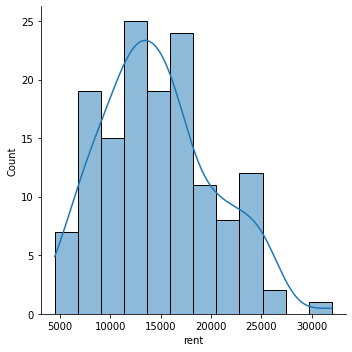

In [ ]:
sns.displot(data=fa_NW,x='rent',kde='true')

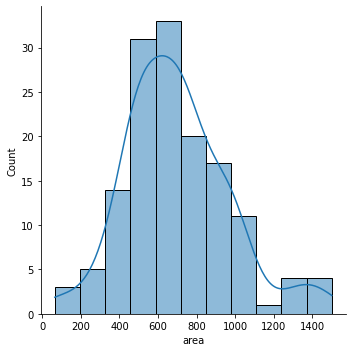

In [ ]:
sns.displot(data=fa_NW,x='area',kde='true')

In [ ]:
import scipy.stats as stats

In [ ]:
stats.levene(fa_E_R,fa_W_R,fa_S_R,fa_N_R,fa_NE_R,fa_NW_R)

LeveneResult(statistic=3.0583397916902486, pvalue=0.009269777811675255)

針對Facing-Area

In [ ]:
fa_E_B = fa_E.iloc[:,3:4]
fa_W_B = fa_W.iloc[:,3:4]
fa_S_B = fa_S.iloc[:,3:4]
fa_N_B = fa_N.iloc[:,3:4]
fa_NE_B = fa_NE.iloc[:,3:4]
fa_NW_B = fa_NW.iloc[:,3:4]

In [ ]:
fa_E_B = fa_E_B.to_numpy().flatten()
fa_W_B = fa_W_B.to_numpy().flatten()
fa_S_B = fa_S_B.to_numpy().flatten()
fa_N_B = fa_N_B.to_numpy().flatten()
fa_NE_B = fa_NE_B.to_numpy().flatten()
fa_NW_B = fa_NW_B.to_numpy().flatten()

In [ ]:
stats.levene(fa_E_B,fa_W_B,fa_S_B,fa_N_B,fa_NE_B,fa_NW_B)

LeveneResult(statistic=0.47464108317752285, pvalue=0.7954317584190675)

針對 year

In [ ]:
ye_1 = df_R4[df_R4['avalable_for']=='All']
ye_2 = df_R4[df_R4['avalable_for']=='Family Only']

In [ ]:
print('All:',len(ye_1),'\n','Family Only:',len(ye_2))

All: 2396 
 Family Only: 1814


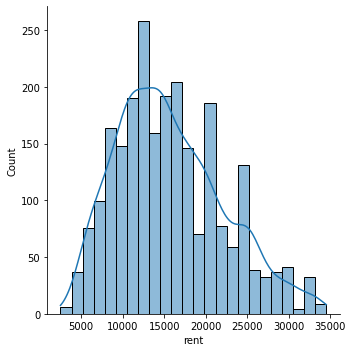

In [ ]:
sns.displot(data=ye_1,x='rent',kde='true')

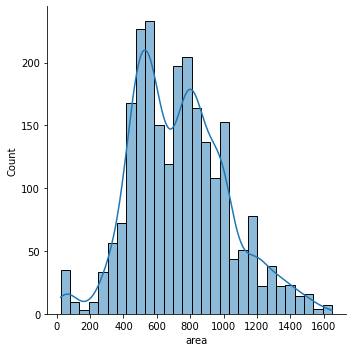

In [ ]:
sns.displot(data=ye_1,x='area',kde='true')

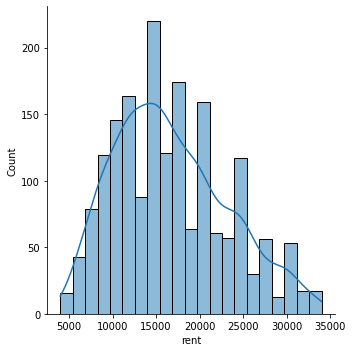

In [ ]:
sns.displot(data=ye_2,x='rent',kde='true')

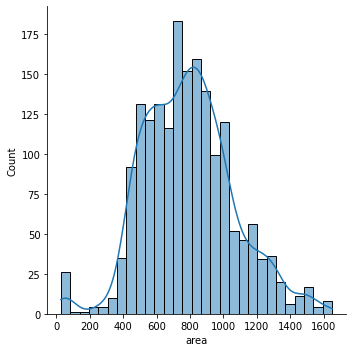

In [ ]:
sns.displot(data=ye_2,x='area',kde='true')

In [ ]:
ye_1_R = ye_1.iloc[:,2:3]
ye_2_R = ye_2.iloc[:,2:3]
ye_1_R = ye_1_R.to_numpy().flatten()
ye_2_R = ye_2_R.to_numpy().flatten()

In [ ]:
stats.levene(ye_1_R,ye_2_R)

LeveneResult(statistic=0.2930554749332106, pvalue=0.58831707856313)

In [ ]:
ye_1_B = ye_1.iloc[:,3:4]
ye_2_B = ye_2.iloc[:,3:4]
ye_1_B = ye_1_B.to_numpy().flatten()
ye_2_B = ye_2_B.to_numpy().flatten()

In [ ]:
stats.levene(ye_1_B,ye_2_B)

LeveneResult(statistic=0.02279836601661016, pvalue=0.8799947052928234)

In [ ]:
from statsmodels.multivariate.manova import MANOVA

In [ ]:
maov = MANOVA.from_formula('rent + area ~ facing + avalable_for + facing*avalable_for'\
,data = df_R4)

In [ ]:
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.2536 2.0000 4197.0000 6176.7522 0.0000
         Pillai's trace 0.7464 2.0000 4197.0000 6176.7522 0.0000
 Hotelling-Lawley trace 2.9434 2.0000 4197.0000 6176.7522 0.0000
    Roy's greatest root 2.9434 2.0000 4197.0000 6176.7522 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          facing         Value   Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9886 10.0000 8394.0000  4.8272 0.0000
          Pillai's trace 0.0114 10.0000 8396.

Two-way anova

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df_A = df_R4['avalable_for']
df_F = df_R4['facing']
df_R = df_R4['rent']
df_E = df_R4['area']

In [ ]:
df_R7 = pd.DataFrame({'avalable_for':df_A,'facing':df_F,'area':df_E})
df_R7

,avalable_for,facing,area
0,All,West,1050.0
1,All,East,760.0
2,Family Only,East,628.0
3,Family Only,East,1530.0
4,All,North-West,1400.0
...,...,...,...
4205,All,East,800.0
4206,All,North,805.0
4207,Family Only,North,900.0
4208,Family Only,South,750.0


In [ ]:
mod = ols('area~avalable_for*facing', data = df_R7).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
avalable_for,2.985314e+06,1.0,38.902021,4.896047e-10
facing,5.373311e+06,5.0,14.004067,1.322564e-13
avalable_for:facing,1.302441e+05,5.0,0.339446,8.892157e-01
Residual,3.221515e+08,4198.0,NaN,NaN


In [ ]:
df_R8 = pd.DataFrame({"avalable_for":df_A,"facing":df_F,"rent":df_R})

In [ ]:
mod = ols('rent~avalable_for + facing + avalable_for*facing',data=df_R8).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
avalable_for,1.028674e+09,1.0,25.104195,5.654917e-07
facing,3.224592e+09,5.0,15.738854,2.205015e-15
avalable_for:facing,1.770878e+08,5.0,0.864345,5.041779e-01
Residual,1.720181e+11,4198.0,NaN,NaN


one way anova

In [ ]:
df_R5 = pd.DataFrame({'avalable_for':df_A,'rent':df_R,'area':df_E})
df_R5

,avalable_for,rent,area
0,All,20000.0,1050.0
1,All,14000.0,760.0
2,Family Only,13000.0,628.0
3,Family Only,28000.0,1530.0
4,All,25999.0,1400.0
...,...,...,...
4205,All,11000.0,800.0
4206,All,20000.0,805.0
4207,Family Only,15000.0,900.0
4208,Family Only,15000.0,750.0


In [ ]:
df_R6 = pd.DataFrame({'facing':df_F,'rent':df_R,'area':df_E})
df_R6

,facing,rent,area
0,West,20000.0,1050.0
1,East,14000.0,760.0
2,East,13000.0,628.0
3,East,28000.0,1530.0
4,North-West,25999.0,1400.0
...,...,...,...
4205,East,11000.0,800.0
4206,North,20000.0,805.0
4207,North,15000.0,900.0
4208,South,15000.0,750.0


In [ ]:
mod = ols('rent~facing ', data = df_R6).fit()
sm.stats.anova_lm(mod, typ = 2,alpha=0.03)

,sum_sq,df,F,PR(>F)
facing,3.231291e+09,5.0,15.684157,2.508030e-15
Residual,1.732238e+11,4204.0,NaN,NaN


In [ ]:
mod = ols('area~facing', data = df_R6).fit()
sm.stats.anova_lm(mod, typ = 2,alpha=0.03)

,sum_sq,df,F,PR(>F)
facing,5.365940e+06,5.0,13.870699,1.810255e-13
Residual,3.252671e+08,4204.0,NaN,NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
mc_fact_rent = pairwise_tukeyhsd(df_R6['rent'],df_R6['facing'],alpha=0.03)
print(mc_fact_rent)

        Multiple Comparison of Means - Tukey HSD, FWER=0.03         
  group1     group2    meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
      East      North -2096.8196  0.001 -3118.0287 -1075.6105   True
      East North-East  -931.2886 0.1408 -2083.6091    221.032  False
      East North-West -2063.2453 0.0026 -3732.7303  -393.7604   True
      East      South -2306.4201  0.001 -3710.5063  -902.3338   True
      East       West -1477.8425  0.001 -2370.0154  -585.6696   True
     North North-East  1165.5311 0.1395  -274.2782  2605.3403  False
     North North-West    33.5743    0.9 -1845.8905  1913.0391  False
     North      South  -209.6004    0.9 -1857.8317  1438.6308  False
     North       West   618.9771 0.6376  -622.4658    1860.42  False
North-East North-West -1131.9568 0.4963  -3085.764   821.8505  False
North-East      South -1375.1315 0.1557 -3107.6559    357.393  False
North-East       West  -546.5539 0

In [ ]:
mc_fact_rent = pairwise_tukeyhsd(df_R6['area'],df_R6['facing'],alpha=0.03)
print(mc_fact_rent)

      Multiple Comparison of Means - Tukey HSD, FWER=0.03      
  group1     group2   meandiff p-adj    lower    upper   reject
---------------------------------------------------------------
      East      North -89.7513  0.001 -134.0031 -45.4995   True
      East North-East -13.4883    0.9  -63.4215   36.445  False
      East North-West -86.7801 0.0039 -159.1235 -14.4368   True
      East      South -76.3904  0.002 -137.2333 -15.5475   True
      East       West -63.8223  0.001 -102.4826  -25.162   True
     North North-East   76.263  0.003   13.8721 138.6539   True
     North North-West   2.9712    0.9  -78.4712  84.4136  False
     North      South  13.3609    0.9  -58.0615  84.7833  False
     North       West   25.929 0.6666  -27.8661  79.7241  False
North-East North-West -73.2919 0.0926 -157.9557   11.372  False
North-East      South -62.9021 0.1144 -137.9772  12.1729  False
North-East       West  -50.334 0.0971 -108.8919   8.2238  False
North-West      South  10.3897    0.9  -

In [ ]:
!pip install statannotations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statannotations.Annotator import Annotator
from matplotlib import pyplot as plt
from scikit_posthocs import posthoc_tukey

West vs. East: Custom statistical test, P_val:1.000e-03
East vs. North-West: Custom statistical test, P_val:2.568e-03
North-West vs. North-East: Custom statistical test, P_val:4.963e-01
North-East vs. North: Custom statistical test, P_val:1.395e-01
North vs. South: Custom statistical test, P_val:9.000e-01
West vs. North-West: Custom statistical test, P_val:9.000e-01
East vs. North-East: Custom statistical test, P_val:1.408e-01
North-West vs. North: Custom statistical test, P_val:9.000e-01
North-East vs. South: Custom statistical test, P_val:1.557e-01
West vs. North-East: Custom statistical test, P_val:8.021e-01
East vs. North: Custom statistical test, P_val:1.000e-03
North-West vs. South: Custom statistical test, P_val:9.000e-01
West vs. North: Custom statistical test, P_val:6.376e-01
East vs. South: Custom statistical test, P_val:1.000e-03
West vs. South: Custom statistical test, P_val:5.876e-01


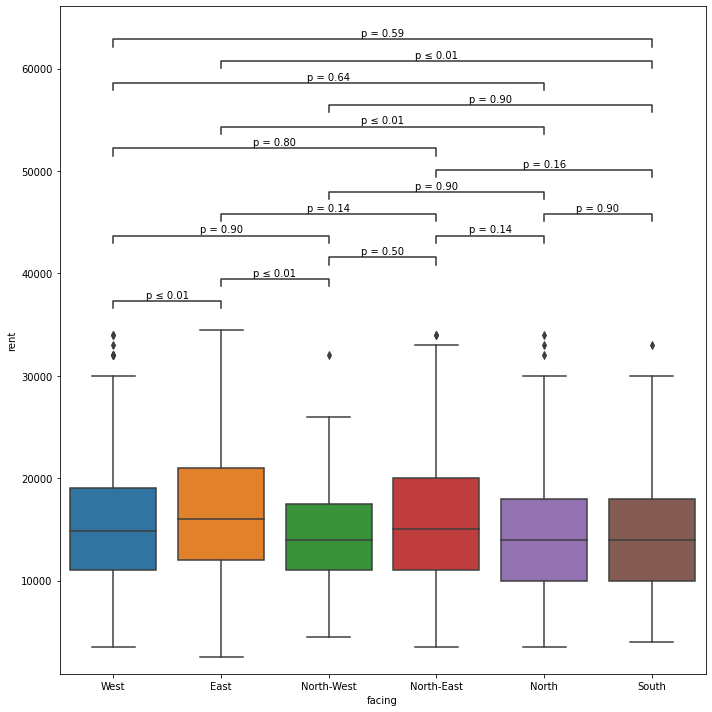

In [ ]:
tukey_df = posthoc_tukey(df_R6,val_col="rent", group_col="facing")
tukey_df

remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_R6, x="facing", y="rent")

pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]

annotator = Annotator(
    ax, pairs, data=df_R6, x="facing", y="rent")
annotator.configure(text_format="simple", loc="inside")
annotator.set_pvalues_and_annotate(p_values)
plt.tight_layout()

West vs. East: Custom statistical test, P_val:1.000e-03
East vs. North-West: Custom statistical test, P_val:3.894e-03
North-West vs. North-East: Custom statistical test, P_val:9.258e-02
North-East vs. North: Custom statistical test, P_val:3.004e-03
North vs. South: Custom statistical test, P_val:9.000e-01
West vs. North-West: Custom statistical test, P_val:9.000e-01
East vs. North-East: Custom statistical test, P_val:9.000e-01
North-West vs. North: Custom statistical test, P_val:9.000e-01
North-East vs. South: Custom statistical test, P_val:1.144e-01
West vs. North-East: Custom statistical test, P_val:9.706e-02
East vs. North: Custom statistical test, P_val:1.000e-03
North-West vs. South: Custom statistical test, P_val:9.000e-01
West vs. North: Custom statistical test, P_val:6.666e-01
East vs. South: Custom statistical test, P_val:2.040e-03
West vs. South: Custom statistical test, P_val:9.000e-01


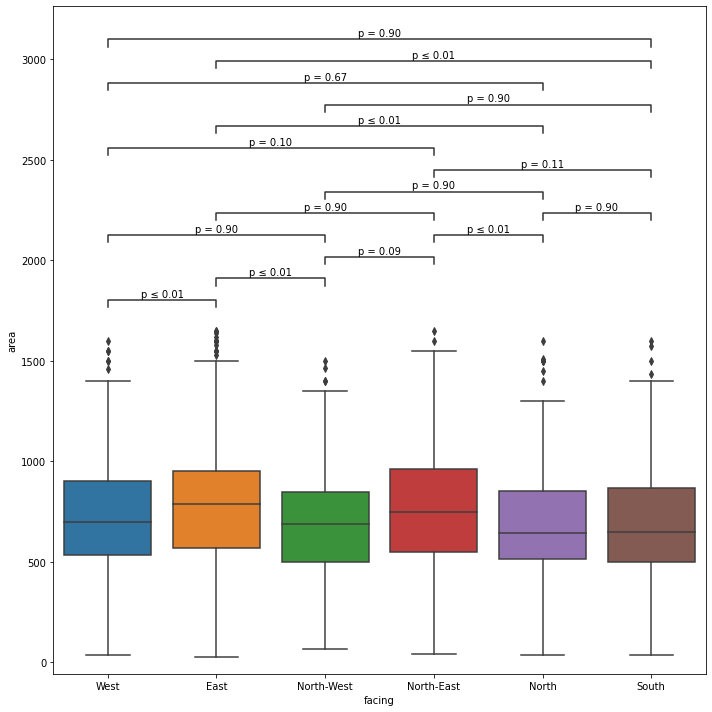

In [ ]:
tukey_df = posthoc_tukey(df_R6,val_col="area", group_col="facing")
tukey_df

remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_R6, x="facing", y="area")

pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]

annotator = Annotator(
    ax, pairs, data=df_R6, x="facing", y="area")
annotator.configure(text_format="simple", loc="inside")
annotator.set_pvalues_and_annotate(p_values)
plt.tight_layout()

Two sample T

In [ ]:
import numpy as np

In [ ]:
df_ALL = df_R5[df_R5['avalable_for']=='All']
df_B = df_R5[df_R5['avalable_for']=='Family Only']

In [ ]:
df_ALL_R = df_ALL.iloc[:,1:2]
df_B_R = df_B.iloc[:,1:2]
df_ALL_R = df_ALL_R.to_numpy()
df_B_R = df_B_R.to_numpy()

In [ ]:
mean1 = np.mean(df_ALL_R)
mean2 = np.mean(df_B_R)
std1 = np.std(df_ALL_R)
std2 = np.std(df_B_R)
nobs1 = len(df_ALL_R)
nobs2 = len(df_B_R)
modified_std1 = np.sqrt(np.float32(nobs1)/np.float32(nobs1-1)) * std1
modified_std2 = np.sqrt(np.float32(nobs2)/np.float32(nobs2-1)) * std2
statistic, pvalue = stats.ttest_ind_from_stats( mean1=mean1, std1=modified_std1, nobs1=nobs1,
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
print('statistic:',statistic,'\n','pvalue:',pvalue)

statistic: -4.98364682582449 
 pvalue: 6.490459281723903e-07


In [ ]:
df_ALL_A = df_ALL.iloc[:,2:3]
df_B_A = df_B.iloc[:,2:3]
df_ALL_A = df_ALL_A.to_numpy()
df_B_A = df_B_A.to_numpy()

In [ ]:
mean1 = np.mean(df_ALL_A)
mean2 = np.mean(df_B_A)
std1 = np.std(df_ALL_A)
std2 = np.std(df_B_A)
nobs1 = len(df_ALL_A)
nobs2 = len(df_B_A)
modified_std1 = np.sqrt(np.float32(nobs1)/np.float32(nobs1-1)) * std1
modified_std2 = np.sqrt(np.float32(nobs2)/np.float32(nobs2-1)) * std2
statistic, pvalue = stats.ttest_ind_from_stats( mean1=mean1, std1=modified_std1, nobs1=nobs1,
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
print('statistic:',statistic,'\n','pvalue:',pvalue)

statistic: -6.184257285767972 
 pvalue: 6.832969045034287e-10
